In [1]:
import pandas as pd

In [2]:
Casualties = pd.read_csv('fatalities_isr_pse_conflict_2000_to_2023.csv')

In [3]:
Casualties['age']

0        32.0
1        21.0
2        16.0
3        19.0
4        15.0
         ... 
11119    64.0
11120    28.0
11121    36.0
11122    21.0
11123    24.0
Name: age, Length: 11124, dtype: float64

In [4]:
Casualties

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,M,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11119,Binyamin Herling,2000-10-19,64.0,Israeli,Nablus,Nablus,West Bank,2000-10-19,M,Israelis,Kedumim,Tulkarm,gunfire,live ammunition,Palestinian civilians,Killed while hiking on Mt. Eival.
11120,Farid Musa 'Issa a-Nesasreh,2000-10-17,28.0,Palestinian,Beit Furik,Nablus,West Bank,2000-10-17,M,Unknown,Beit Furik,Nablus,gunfire,NaN,Israeli civilians,Killed by a settler from Itamar while harvesti...
11121,Hillel Lieberman,2000-10-07,36.0,Israeli,Nablus,Nablus,West Bank,2000-10-07,M,Israelis,Elon Moreh,Nablus,gunfire,live ammunition,Palestinian civilians,His body was found a day after he disappeared.
11122,Fahed Mustafa 'Odeh Baker,2000-10-07,21.0,Palestinian,Bidya,Salfit,West Bank,2000-10-07,M,No,Bidya,Salfit,gunfire,NaN,Israeli civilians,Killed by settlers who rioted in Biddya village.


In [5]:
Casualties.rename(columns = {'date_of_event': 'date_event',
                             'took_part_in_the_hostilities': 'hostile',
                             'event_location': 'loc',
                             'event_location_district': 'loc_district',
                             'event_location_region': 'loc_region'}, inplace = True)

In [6]:
pd.set_option('display.max_columns', None)
Casualties.head(0)

,name,date_event,age,citizenship,loc,loc_district,loc_region,date_of_death,gender,hostile,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes


In [7]:
Casualties['date_event'] = pd.to_datetime(Casualties['date_event'])

In [8]:
Casualty_ratio = Casualties[(Casualties['citizenship'] == 'Palestinian') | (Casualties['citizenship'] == 'Israeli')]['citizenship'].value_counts()
Casualty_ratio

citizenship
Palestinian    10092
Israeli         1029
Name: count, dtype: int64

<Axes: title={'center': 'Casualty ratio'}, ylabel='count'>

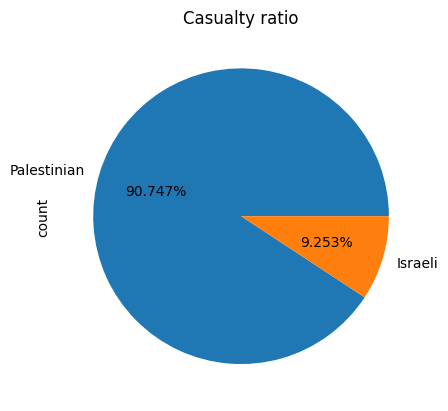

In [9]:
Casualty_ratio.plot(kind = 'pie', title = 'Casualty ratio', autopct = '%.3f%%')

<Axes: title={'center': 'Deaths by hostility'}, ylabel='count'>

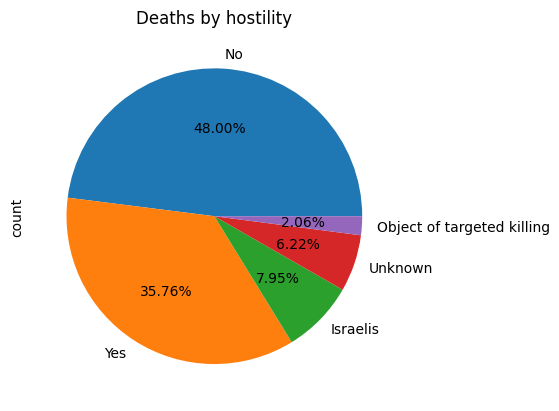

In [10]:
Casualties['hostile'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', title = 'Deaths by hostility')

In [16]:
Casualties['ammunition'].count()

5871

In [64]:
x = pd.DataFrame (Casualties.groupby(['ammunition'])['killed_by'].value_counts())
x

count
ammunition                  killed_by                     
0.22-caliber bullets        Israeli security forces     16
Qassam rocket               Palestinian civilians       15
bomb                        Palestinian civilians      136
                            Israeli security forces    113
car bomb                    Palestinian civilians       13
                            Israeli security forces      2
explosive belt              Palestinian civilians      326
flare bomb                  Israeli security forces      1
flechette shells            Israeli security forces     22
grad rocket                 Palestinian civilians        7
grenade                     Palestinian civilians        1
                            Israeli security forces      1
knife                       Palestinian civilians       33
                            Israeli civilians            4
live ammunition             Israeli security forces   1343
                            Palestinian civilians      127
                            Israeli civilians           44
missile                     Israeli security forces   2858
                            Palestinian civilians       19
mortar fire                 Israeli security forces     42
                            Palestinian civilians        9
phosphorus shell            Israeli security forces     16
rock                        Palestinian civilians        1
rocket                      Palestinian civilians       12
rubber-coated metal bullets Israeli security forces     19
shell                       Israeli security forces    675
sponge rounds               Israeli security forces      2
stun grenade                Israeli security forces      1
teargas canister            Israeli security forces     13

In [68]:
xy = pd.pivot_table(data = x, index = ['ammunition'], columns = ['killed_by'], values = ['count'])
xy

count                          \
killed_by                   Israeli civilians Israeli security forces   
ammunition                                                              
0.22-caliber bullets                      NaN                    16.0   
Qassam rocket                             NaN                     NaN   
bomb                                      NaN                   113.0   
car bomb                                  NaN                     2.0   
explosive belt                            NaN                     NaN   
flare bomb                                NaN                     1.0   
flechette shells                          NaN                    22.0   
grad rocket                               NaN                     NaN   
grenade                                   NaN                     1.0   
knife                                     4.0                     NaN   
live ammunition                          44.0                  1343.0   
missile                                   NaN                  2858.0   
mortar fire                               NaN                    42.0   
phosphorus shell                          NaN                    16.0   
rock                                      NaN                     NaN   
rocket                                    NaN                     NaN   
rubber-coated metal bullets               NaN                    19.0   
shell                                     NaN                   675.0   
sponge rounds                             NaN                     2.0   
stun grenade                              NaN                     1.0   
teargas canister                          NaN                    13.0   

                                                   
killed_by                   Palestinian civilians  
ammunition                                         
0.22-caliber bullets                          NaN  
Qassam rocket                                15.0  
bomb                                        136.0  
car bomb                                     13.0  
explosive belt                              326.0  
flare bomb                                    NaN  
flechette shells                              NaN  
grad rocket                                   7.0  
grenade                                       1.0  
knife                                        33.0  
live ammunition                             127.0  
missile                                      19.0  
mortar fire                                   9.0  
phosphorus shell                              NaN  
rock                                          1.0  
rocket                                       12.0  
rubber-coated metal bullets                   NaN  
shell                                         NaN  
sponge rounds                                 NaN  
stun grenade                                  NaN  
teargas canister                              NaN

<Axes: xlabel='ammunition'>

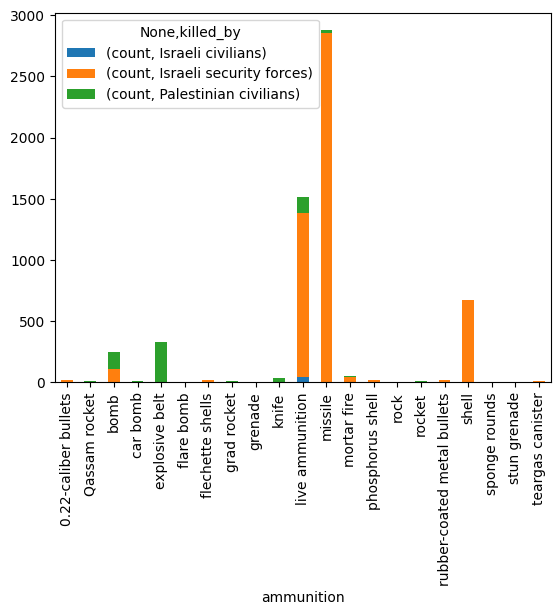

In [70]:
xy.plot(kind = 'bar', stacked = True)